In [46]:
import pandas as pd
import numpy as np
data=pd.read_excel('C:/Users/sadhv/OneDrive/Desktop/data.xlsx',parse_dates=['Date'])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2435 entries, 0 to 2434
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2435 non-null   datetime64[ns]
 1   Cost    2435 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 38.2 KB


,Date,Cost
0,2015-01-01,4167
1,2015-01-02,4291
2,2015-01-03,4294
3,2015-01-04,4287
4,2015-01-05,4499


Graphical EDA for Anomaly Detection

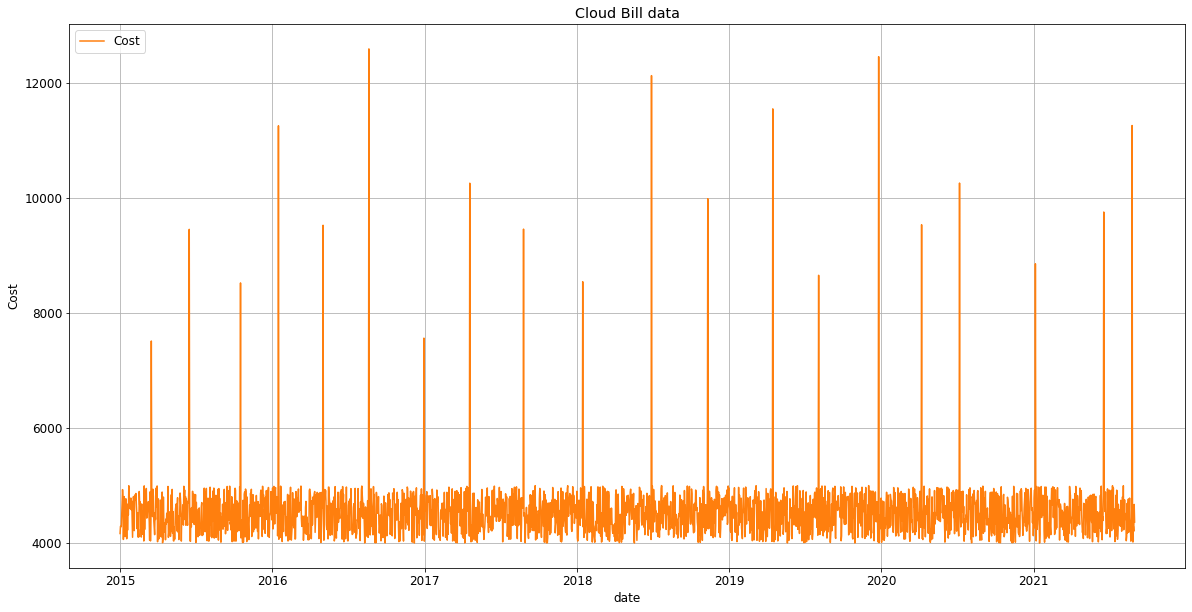

In [47]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 10))

# Specify how our lines should look
ax.plot(data.Date, data.Cost, color='tab:orange', label='Cost')

ax.set_xlabel('date')
ax.set_ylabel('Cost')
ax.set_title('Cloud Bill data')
ax.grid(True)
ax.legend(loc='upper left');

Deterministic Components of Time Series(Trend+Seasonality+Residual(Anomalies))

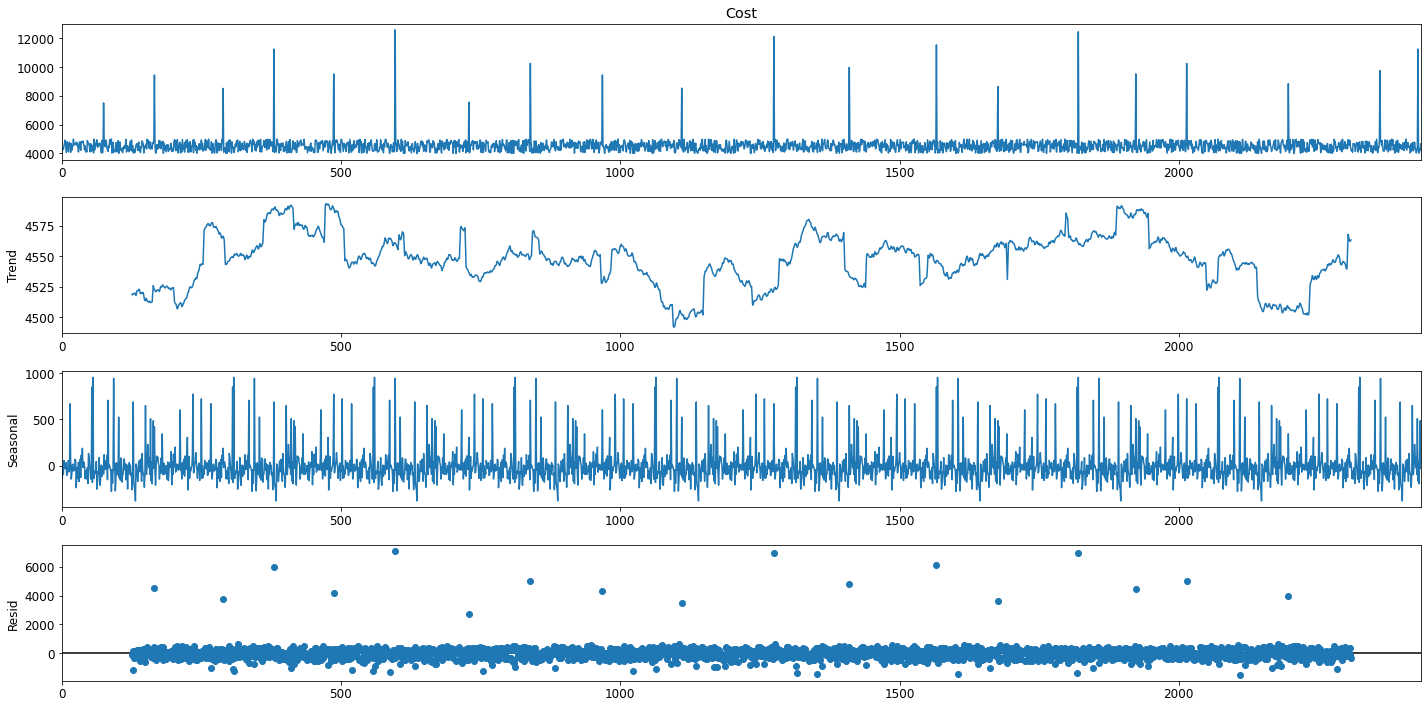

In [51]:
import statsmodels#Statsmodels is a Python module which provides various functions for estimating different statistical models and performing statistical tests
from pylab import rcParams
rcParams['figure.figsize']=20,10
decomposition=statsmodels.api.tsa.seasonal_decompose(data['Cost'],period=252)
fig=decomposition.plot()

In [52]:
Trend,Seasonal,Residue=decomposition.trend,decomposition.seasonal,decomposition.resid

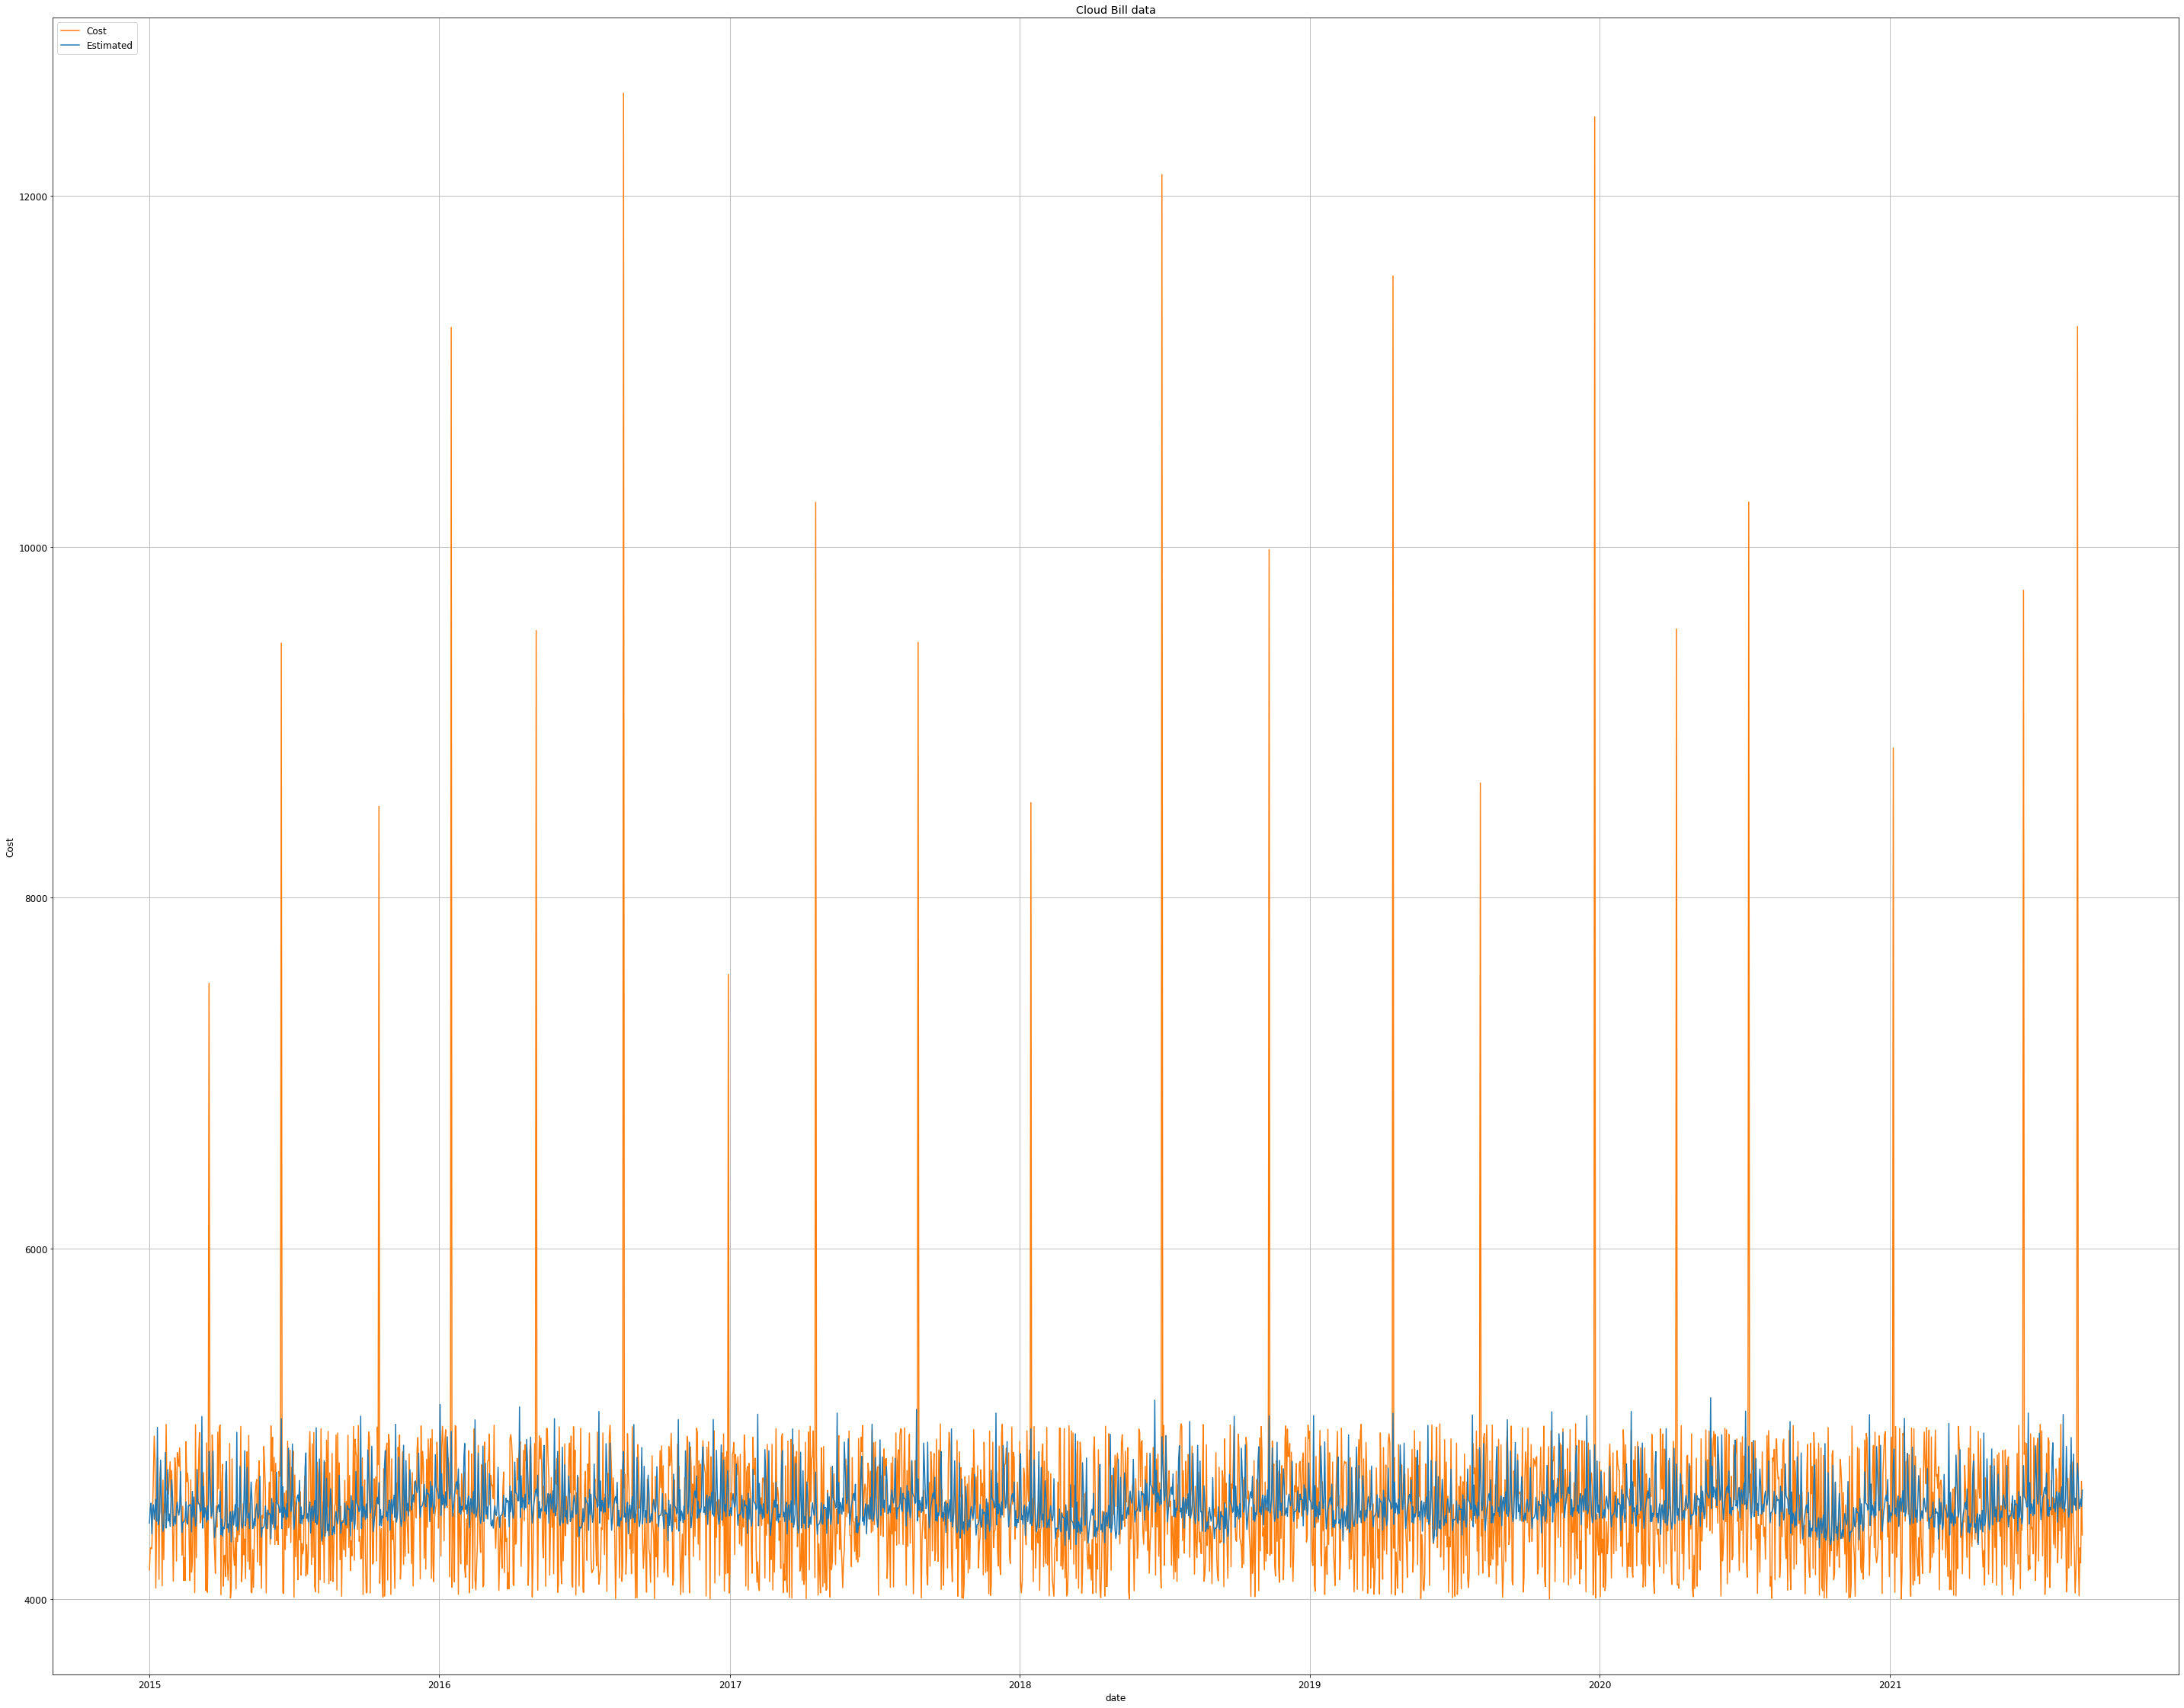

In [27]:
estimated = Trend + Seasonal
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(50,40))

# Specify how our lines should look
ax.plot(data.Date, data.Cost, color='tab:orange', label='Cost')
ax.plot(data.Date,estimated,color='tab:blue',label='Estimated')
ax.set_xlabel('date')
ax.set_ylabel('Cost')
ax.set_title('Cloud Bill data')
ax.grid(True)
ax.legend(loc='upper left');

In [28]:
resid_mu = Residue.mean()
resid_dev =Residue.std()
lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(50,40))